In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

(476, 630)


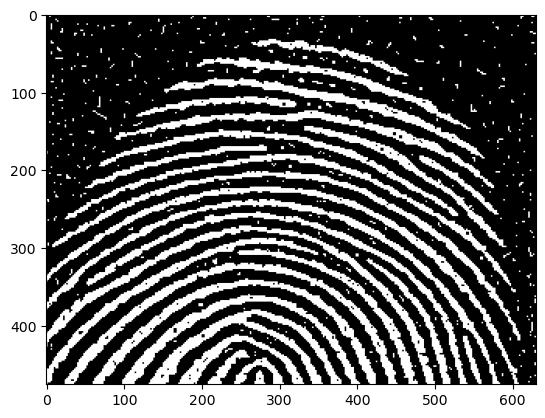

In [27]:
ip = cv.imread('Input.png', cv.IMREAD_GRAYSCALE)

print(ip.shape)

plt.imshow(ip, cmap='gray')

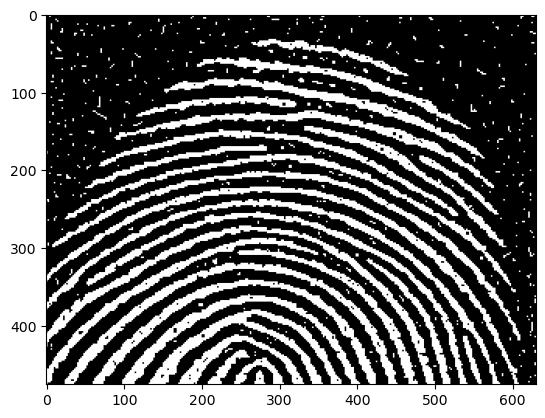

In [39]:
def grayscale_to_binary(grayscale_image, threshold=128):
    binary_image = []
    for row in grayscale_image:
        binary_row = []
        for pixel in row:
            binary_pixel = 1 if pixel >= threshold else 0
            binary_row.append(binary_pixel)
        binary_image.append(binary_row)
    return binary_image


img_binary = grayscale_to_binary(ip, 128)

# print(img_binary[0:5])
plt.imshow(img_binary, cmap='gray')
plt.show()

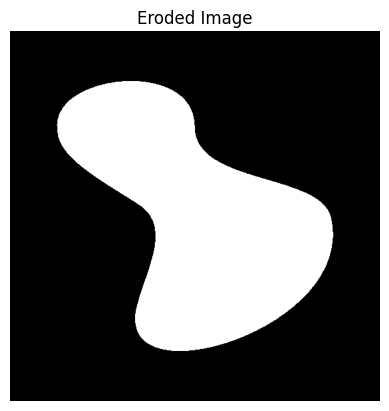

In [7]:
# Erosion function
def erosion(image, struct_elem):
    rows = len(image)
    cols = len(image[0])
    se_size = len(struct_elem)
    pad = se_size // 2

    # Output size will be (rows - 2) x (cols - 2)
    output = [[0 for _ in range(cols - 2 * pad)] for _ in range(rows - 2 * pad)]

    for i in range(pad, rows - pad):
        for j in range(pad, cols - pad):
            match = True
            for m in range(se_size):
                for n in range(se_size):
                    if struct_elem[m][n] == 1:
                        ii = i + m - pad
                        jj = j + n - pad
                        if image[ii][jj] != 1:
                            match = False
            output[i - pad][j 
                            - pad] = 1 if match else 0
    return output


image = img_binary

# Cross-shaped 3x3 structuring element
structuring_element = [
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
]

# Apply erosion
eroded_image = erosion(image, structuring_element)

plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')
plt.show()


In [16]:
def dilation(image, struct_elem):
    rows = len(image)
    cols = len(image[0])
    se_size = len(struct_elem)
    pad = se_size // 2

    # Output image size is reduced by padding on each side
    output = [[0 for _ in range(cols - 2 * pad)] for _ in range(rows - 2 * pad)]

    for i in range(pad, rows - pad):
        for j in range(pad, cols - pad):
            dilate = False
            for m in range(se_size):
                for n in range(se_size):
                    if struct_elem[m][n] == 1:
                        ii = i + m - pad
                        jj = j + n - pad
                        if image[ii][jj] == 1:
                            dilate = True
            output[i - pad][j - pad] = 1 if dilate else 0
    return output


In [ ]:
# Apply dilation
img_dilation = dilation(eroded_image, structuring_element)
# pad = dilation(eroded_image, structuring_element)

# print(pad)

plt.imshow(img_dilation, cmap='gray')
plt.title('dilated Image')
plt.axis('off')
plt.show()

1


# Openning and Closing

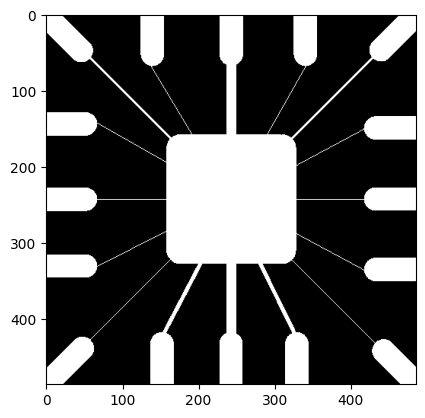

In [19]:
ip = cv.imread('wirebond_mask.tif', cv.IMREAD_GRAYSCALE)

plt.imshow(ip, cmap='gray')

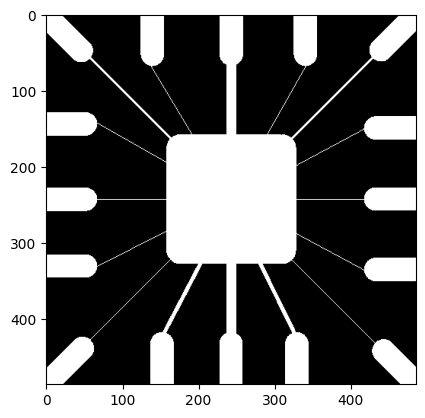

In [20]:
def grayscale_to_binary(grayscale_image, threshold=128):
    binary_image = []
    for row in grayscale_image:
        binary_row = []
        for pixel in row:
            binary_pixel = 1 if pixel >= threshold else 0
            binary_row.append(binary_pixel)
        binary_image.append(binary_row)
    return binary_image


img_binary = grayscale_to_binary(ip, 128)

# print(img_binary[0:5])
plt.imshow(img_binary, cmap='gray')
plt.show()

In [21]:
def opening(image, struct_elem):
    eroded = erosion(image, struct_elem)
    opened = dilation(eroded, struct_elem)
    return opened

def closing(image, struct_elem):
    dilated = dilation(image, struct_elem)
    closed = erosion(dilated, struct_elem)
    return closed


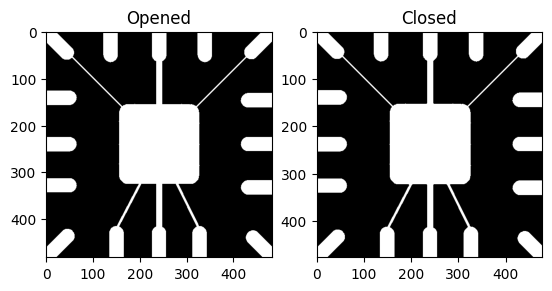

In [22]:
# Assume image is binary (0 and 1), and struct_elem is 3x3 cross-shaped or square
# Cross-shaped 3x3 structuring element
structuring_element = [
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
]

opened_image = opening(img_binary, structuring_element)
closed_image = closing(opened_image, structuring_element)

# Display result
plt.subplot(1, 2, 1)
plt.imshow(opened_image, cmap='gray')
plt.title('Opened')

plt.subplot(1, 2, 2)
plt.imshow(closed_image, cmap='gray')
plt.title('Closed')

plt.show()


# Boundary Extraction


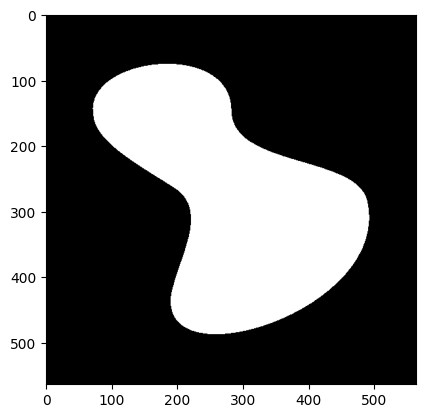

In [3]:
ip = cv.imread('constant_gray_region.tif', cv.IMREAD_GRAYSCALE)

plt.imshow(ip, cmap='gray')

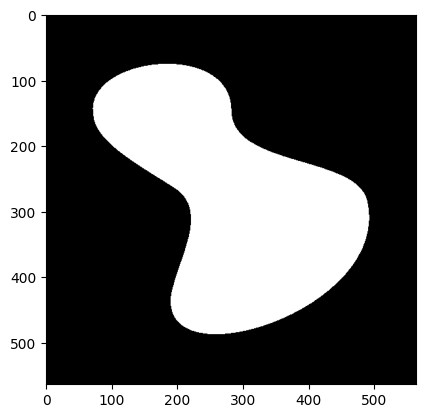

In [4]:
def grayscale_to_binary(grayscale_image, threshold=128):
    binary_image = []
    for row in grayscale_image:
        binary_row = []
        for pixel in row:
            binary_pixel = 1 if pixel >= threshold else 0
            binary_row.append(binary_pixel)
        binary_image.append(binary_row)
    return binary_image


img_binary = grayscale_to_binary(ip, 128)

# print(img_binary[0:5])
plt.imshow(img_binary, cmap='gray')
plt.show()

In [5]:
def boundary_extraction(image, struct_elem):
    eroded = erosion(image, struct_elem)
    rows = len(eroded)
    cols = len(eroded[0])

    # Subtract eroded image from original (both must be same size)
    boundary = [[image[i+1][j+1] - eroded[i][j] for j in range(cols)] for i in range(rows)]
    return boundary


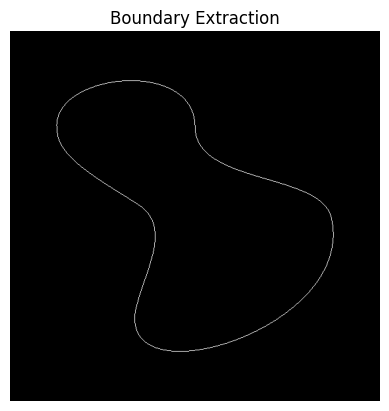

In [8]:
# --------- Boundary Extraction ----------

# Cross-shaped 3x3 structuring element
structuring_element = [
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
]

boundary = boundary_extraction(img_binary, structuring_element)
plt.imshow(boundary, cmap='gray')
plt.title("Boundary Extraction")
plt.axis('off')
plt.show()

# Region filling

(512, 512)


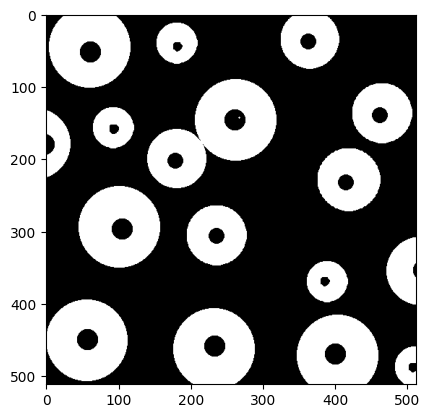

In [4]:
region_filling_image = cv.imread('region_filling.tif', cv.IMREAD_GRAYSCALE)

print(region_filling_image.shape)

plt.imshow(region_filling_image, cmap='gray')

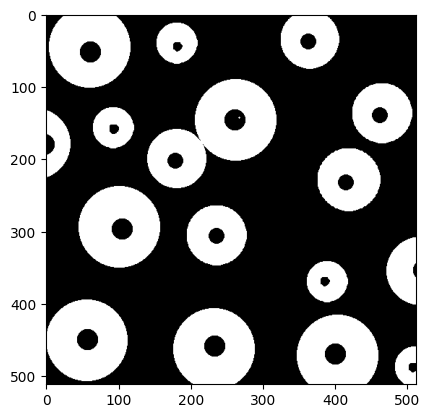

In [11]:
def grayscale_to_binary(grayscale_image, threshold=128):
    binary_image = []
    for row in grayscale_image:
        binary_row = []
        for pixel in row:
            binary_pixel = 1 if pixel >= threshold else 0
            binary_row.append(binary_pixel)
        binary_image.append(binary_row)
    return binary_image


img_binary = grayscale_to_binary(region_filling_image, 128)

# print(img_binary[0:5])
plt.imshow(img_binary, cmap='gray')
plt.show()

In [15]:
def complement(image):
    return [[1 - pixel for pixel in row] for row in image]

def logical_and(img1, img2):
    return [[img1[i][j] & img2[i][j] for j in range(len(img1[0]))] for i in range(len(img1))]

def images_equal(img1, img2):
    for i in range(len(img1)):
        for j in range(len(img1[0])):
            if img1[i][j] != img2[i][j]:
                return False
    return True

def pad_image(image, pad):
    rows = len(image)
    cols = len(image[0])
    padded = [[0 for _ in range(cols + 2*pad)] for _ in range(rows + 2*pad)]
    for i in range(rows):
        for j in range(cols):
            padded[i + pad][j + pad] = image[i][j]
    return padded

def unpad_image(image, pad):
    return [row[pad:-pad] for row in image[pad:-pad]]


In [16]:
def dilation(image, struct_elem):
    rows = len(image)
    cols = len(image[0])
    se_size = len(struct_elem)
    pad = se_size // 2

    padded = pad_image(image, pad)
    output = [[0 for _ in range(cols)] for _ in range(rows)]

    for i in range(pad, pad + rows):
        for j in range(pad, pad + cols):
            for m in range(se_size):
                for n in range(se_size):
                    if struct_elem[m][n] == 1:
                        ii = i + m - pad
                        jj = j + n - pad
                        if padded[ii][jj] == 1:
                            output[i - pad][j - pad] = 1
                            break
                else:
                    continue
                break
    return output


In [17]:
def region_fill(seed, mask, struct_elem):
    prev = seed
    while True:
        dilated = dilation(prev, struct_elem)
        next_filled = logical_and(dilated, mask)
        if images_equal(next_filled, prev):
            break
        prev = next_filled
    return prev


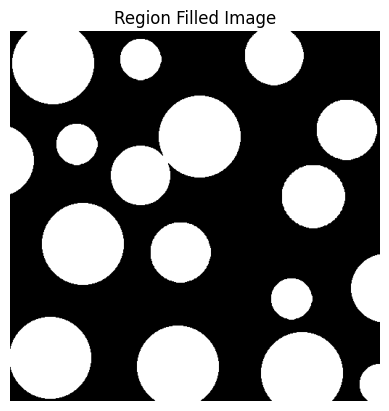

In [23]:
# Create a seed point manually inside a hole
seed = [[0 for _ in range(len(img_binary[0]))] for _ in range(len(img_binary))]
seed[100][100] = 1  # Must lie inside the hole

# Mask is the complement of the object
mask = complement(img_binary)

# Define structuring element (cross-shaped)
structuring_element = [
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
]
mask = complement(img_binary)

region_filled = region_fill(seed, mask, structuring_element)
region_filled = unpad_image(region_filled, 1)
region_filled = complement(region_filled)
plt.imshow(region_filled, cmap='gray')
plt.title('Region Filled Image')
plt.axis('off')
plt.show()
